
* **Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.**
* **Update your implementation to work for mini-batch.**




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
def h(x,theta):
    return x@theta.T

def cost(x,y,theta):
    m=len(y)
    return (sum(np.power((h(x,theta)-y),2))/(2*m))

def dj(x,y,theta):
    m=len(y)
    return x.T@((1/m)*(h(x,theta)-y))

In [3]:
data2 = np.genfromtxt(r"D:\numerical op\intake 1\labs\MultipleLR.csv", delimiter=",")

x=np.hstack((np.ones((len(data2),1)),data2[:,0:3]))
y=data2[:,3]
print(x.shape)
print(y.shape)
theta=np.zeros(x.shape[1])

(25, 4)
(25,)


# Adam (Batch Version)

In [4]:
def adam(x,y,theta,lr,beta1,beta2,max_it):
    theta=np.zeros(x.shape[1])
    j1=10**10
    j2=10**9
    n=0
    vt=0
    epslon=10**(-8)
    jlist=[]
    mt=0
    while abs(j2-j1)>0.00007 and n<max_it:
        mt=beta2*mt+(1-beta2)*dj(x,y,theta)
        if beta2 !=1:
            mt=mt/(1-beta2**(n+1))
        vt=beta1*vt+(1-beta1)*(dj(x,y,theta)**2)
        
        if beta1 !=1:
            vt=vt/(1-beta1**(n+1))
        G=vt**0.5+epslon
        theta=theta - (lr/G)*mt
        j1=j2
        j2=cost(x,y,theta)
        jlist.append(j2)
        n+=1
    plt.plot(jlist)
    plt.show()
    return theta,n

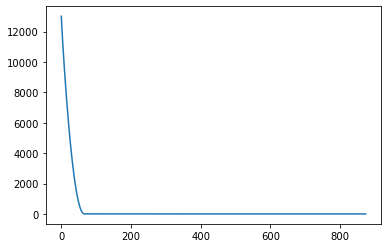

adam r2 = 0.9891440951265509 iterations = 874 [-0.56849595  0.37511562  0.52436616  1.12022454]


In [5]:
theta4,n = adam(x, y, theta, 0.01,0.5,0.5,10000)


print("adam","r2 =",r2_score(y,h(x,theta4)),"iterations =",n,theta4)

# Adam ( mini Batch)

In [6]:
def adam_mini(x,y,theta,lr,beta1,beta2,max_it,batch_size):
    theta=np.zeros(x.shape[1])
    j1=float(10**10)
    j2=float(10**9)
    n=0
    vt=0
    epslon=10**(-8)
    jlist=[]
    mt=0
    samples_num = int(len(y) / batch_size)
    
    for i in range(max_it): 
        for j in range(1,samples_num):
            start_index=((j-1)*batch_size)
            end_index = (j*batch_size)
            if j==1 :
                x_batches = x[:end_index]
                y_batches = y[:end_index]
            elif j== samples_num :
                x_batches = x[start_index:]
                y_batches = y[start_index:]
            else:
                x_batches = x[start_index:end_index]
                y_batches = y[start_index:end_index]
                
            b=len(x_batches)
            mt=beta2*mt+(1-beta2)*dj(x_batches,y_batches,theta)
            if beta2 !=1:
                mt=mt/(1-beta2**(n+1))
            vt=beta1*vt+(1-beta1)*(dj(x_batches,y_batches,theta)**2)
        
            if beta1 !=1:
                vt=vt/(1-beta1**(n+1))
            G=vt**0.5+epslon
            theta=theta - (lr/G)*mt
            j1=j2
            j2=cost(x_batches,y_batches,theta)
            jlist.append(j2)
            n+=1
        
        
        if abs(j2-j1)<.1:
            break
    plt.plot(jlist)
    plt.show()
    return theta,jlist,n

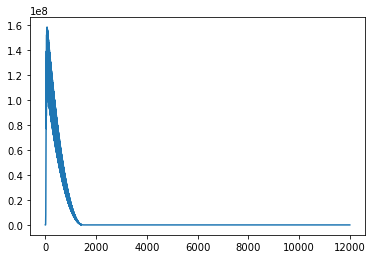

adam r2 = 0.9889902192744022 iterations = 12000 [-3.55331733  0.43371988  0.5466978   1.07372499]


In [7]:
theta4,cost,n=adam_mini(x, y, theta, 0.05,0.9,0.9,3000,5)


print("adam","r2 =",r2_score(y,h(x,theta4)),"iterations =",n,theta4)